## TRABAJO DE PREPARACIÓN DE DATOS

#### DB: Iowa-Housing 
#### Por: Maicol Llano Moncada

In [66]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Problema a resolver con los datos
Predecir el valor de una casa con base en una serie de atributos y características


# 1. Cargar Datos

In [67]:
df = pd.read_csv('Valor_Casas_Iowa.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0


INFORMACIÓN DE LA TABLA

- MSSubClass: la clase de construcción
- MSZoning: la clasificación general de zonificación
- LotFrontage: pies lineales de la calle conectados a la propiedad
- LotArea: Tamaño del lote en pies cuadrados
- Calle: tipo de acceso por carretera
- Callejón: tipo de acceso a callejones
- LotShape: forma general de la propiedad
- LandContour: Planitud de la propiedad
- Utilidades: tipo de utilidades disponibles
- LandSlope: pendiente de la propiedad
- Vecindario: ubicaciones físicas dentro de los límites de la ciudad de Ames
- Condición 1: proximidad a la carretera principal o ferrocarril
- Condition2: Proximidad a la carretera principal o al ferrocarril (si hay un segundo presente)
- BldgType: tipo de vivienda
- HouseStyle: estilo de vivienda
- OverallQual: material general y calidad de acabado
- OverallCond: calificación de condición general
- Año de construcción: fecha de construcción original
- YearRemodAdd: fecha de remodelación
- RoofStyle: tipo de techo
- RoofMatl: material de techo
- Exterior1: revestimiento exterior en la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
- MasVnrType: tipo de chapa de mampostería
- MasVnrArea: área de chapa de mampostería en pies cuadrados
- ExterQual: calidad del material exterior
- ExterCond: estado actual del material en el exterior
- Fundación: tipo de fundación
- BsmtQual: Altura del sótano
- BsmtCond: estado general del sótano
- BsmtExposure: muros de sotano a ras de suelo o de jardín
- BsmtFinType1: calidad del área acabada del sótano
- BsmtFinSF1: Tipo 1 pies cuadrados terminados
- BsmtFinType2: Calidad del segundo área terminada (si está presente)
- BsmtFinSF2: Tipo 2 pies cuadrados terminados
- BsmtUnfSF: Pies cuadrados sin terminar del área del sótano
- TotalBsmtSF: pies cuadrados totales del área del sótano
- Calefacción: tipo de calefacción
- HeatingQC: calidad y condición de la calefacción
- CentralAir: aire acondicionado central
- Eléctrico: sistema eléctrico
- 1stFlrSF: primer piso pies cuadrados
- 2ndFlrSF: segundo piso pies cuadrados
- LowQualFinSF: Pies cuadrados terminados de baja calidad (todos los pisos)
- GrLivArea: pies cuadrados del área habitable sobre el nivel del suelo
- BsmtFullBath: baños completos en el sótano
- BsmtHalfBath: medio baño en el sótano
- FullBath: baños completos por encima de la calificación
- HalfBath: medio baño por encima del grado
- Dormitorio: Número de habitaciones sobre el nivel del sótano
- Cocina: cantidad de cocinas
- KitchenQual: calidad de la cocina
- TotRmsAbvGrd: Total de habitaciones por encima del grado (no incluye baños)
- Funcional: calificación de la funcionalidad del hogar
- Chimeneas: cantidad de chimeneas
- FireplaceQu: calidad de la chimenea
- GarageType: ubicación del garaje
- GarageYrBlt: año de construcción del garaje
- GarageFinish: acabado interior del garaje
- GarageCars: tamaño del garaje en la capacidad del automóvil
- GarageArea: Tamaño del garaje en pies cuadrados
- GarageQual: calidad de garaje
- GarageCond: condición de garaje
- PavedDrive: Entrada pavimentada
- WoodDeckSF: área de cubierta de madera en pies cuadrados
- OpenPorchSF: área de porche abierto en pies cuadrados
- EnclosedPorch: área cerrada del porche en pies cuadrados
- 3SsnPorch: área de porche de tres estaciones en pies cuadrados
- ScreenPorch: Área del porche de la pantalla en pies cuadrados
- PoolArea: área de la piscina en pies cuadrados
- PoolQC: calidad de la piscina
- Cerca: calidad de la cerca
- MiscFeature: característica miscelánea no cubierta en otras categorías
- MiscVal: $ Valor de la función miscelánea
- MoSold: Mes vendido
- Año vendido: Año vendido
- SaleType: Tipo de venta
- SaleCondition: Estado de venta

DATOS DE SALIDA:

- SalePrice: El precio de venta en dólares


# 2. Descripcion de datos

In [68]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr     float64
KitchenAbvGr     float64
KitchenQual       object
TotRmsAbvGrd     float64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [69]:
#tamaño del dataframe
df.shape

(1584, 81)

In [70]:
print('Numero de casas = {}'.format(len(df)))

Numero de casas = 1584


In [71]:
# Que pasa si se eliminan todos las filas y columnas con datos faltantes
df.dropna().shape

(0, 81)

In [72]:
# Realizar un analisis estadistico de las variables numericas
# Segun el tipo 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1584.000000,1584.000000,1297.000000,1581.000000,1584.000000,1584.000000,1584.000000,1577.000000,1574.000000,1582.000000,...,1582.000000,1582.000000,1584.000000,1584.000000,1580.000000,1580.000000,1583.000000,1580.000000,1577.000000,1566.000000
mean,716.138258,56.515152,70.377795,10500.365591,6.102273,5.560606,1971.448232,1984.783767,104.951715,443.397598,...,95.346397,46.284450,21.690025,3.444444,14.831013,2.853165,40.899558,6.284810,2007.818009,180869.194764
std,432.715438,42.143407,25.043741,9753.087800,1.380175,1.104228,30.099412,20.696398,182.320241,472.029850,...,126.608003,65.459211,60.418068,28.982787,54.975980,40.451786,476.867687,2.718575,1.335471,78820.237726
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,321.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,717.500000,50.000000,70.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,379.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163700.000000
75%,1091.250000,70.000000,80.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,166.750000,703.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214375.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3. Datos duplicados

In [73]:
#Inicialmente se revisa las instancias que tienen el campo de ID duplicado. Se observa que son en total 248 instancias duplicadas 
#en este campo, es decir, 124 registros que pueden ser descartados. Sin embargo, no se han analizado los otros atributos

ids = df["Id"]
a=df[ids.isin(ids[ids.duplicated()])].sort_values(by='Id')
print(a['Id'].nunique())
a


124


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
98,99,30,RL,85.0,10625.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,5.0,2010.0,COD,Abnorml,83000.0
1460,99,30,RL,85.0,10625.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,5.0,2010.0,COD,Abnorml,83000.0
99,100,20,RL,77.0,9320.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,1.0,2010.0,WD,Normal,128950.0
1461,100,20,RL,77.0,9320.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,1.0,2010.0,WD,Normal,128950.0
100,101,20,RL,NaN,10603.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2010.0,WD,Normal,205000.0
1462,101,20,RL,NaN,10603.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2010.0,WD,Normal,205000.0
101,102,60,RL,77.0,9206.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,178000.0
1463,102,60,RL,77.0,9206.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,178000.0
102,103,90,RL,64.0,7018.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Alloca,118964.0
1464,103,90,RL,64.0,7018.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Alloca,118964.0


In [74]:
# En este caso se seleccionaron las instancias que están duplicadas en todos los atributos
#Como resultado se obtuvieron 89 instancias duplicadas completamente. 

df[df.duplicated()].sort_values(by='Id')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,99,30,RL,85.0,10625.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,5.0,2010.0,COD,Abnorml,83000.0
1461,100,20,RL,77.0,9320.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,400.0,1.0,2010.0,WD,Normal,128950.0
1462,101,20,RL,NaN,10603.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2010.0,WD,Normal,205000.0
1463,102,60,RL,77.0,9206.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,178000.0
1464,103,90,RL,64.0,7018.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Alloca,118964.0
1465,104,20,RL,94.0,10402.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2010.0,WD,Normal,198900.0
1466,105,50,RM,NaN,7758.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2007.0,WD,Normal,169500.0
1467,106,60,FV,75.0,9375.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2008.0,WD,Normal,250000.0
1468,107,30,RM,60.0,10800.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,NaN,NaN,Shed,450.0,8.0,2007.0,WD,Normal,100000.0
1469,108,20,RM,50.0,6000.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Partial,115000.0


In [75]:
#Se procede a eliminar las instancias duplicadas

df.drop_duplicates(inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
5,6,50,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0
6,7,20,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000.0
7,8,60,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9,50,RM,51.0,6120.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2008.0,WD,Normal,118000.0


In [76]:
#df[df["Id"].duplicated()]
#df[df['Id'].isin(df['Id'][df['Id'].duplicated()])]
#df[df['Id'].isin(df['Id'][df['Id'].duplicated()])].sort_values(by='Id').isnull().sum(axis=1)
#df[df['Id']==1001]
#df.reset_index()

#Se encontró que aún existen instancias que tienen el campo de ID duplicado. En este caso, se eliminaron las instancias que más 
#campos nulos tenían entre cada pareja duplicada. 

df.index = pd.RangeIndex(len(df.index))
serie=df[df['Id'].isin(df['Id'][df['Id'].duplicated()])].sort_values(by='Id').isnull().sum(axis=1)
valores=serie.values
index=serie.index.values

contador=1
for x in range(int(len(valores)/2)):
    if valores[contador]>valores[contador-1]:
        df.drop([index[contador]],inplace=True)
    else:
        df.drop([index[contador-1]],inplace=True)
        
    contador+=2
    
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
5,6,50,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0
6,7,20,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000.0
7,8,60,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9,50,RM,51.0,6120.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2008.0,WD,Normal,118000.0


In [77]:
#Se resetea el valor del index del dataframe
df.index = pd.RangeIndex(len(df.index))
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
5,6,50,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0
6,7,20,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000.0
7,8,60,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9,50,RM,51.0,6120.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2008.0,WD,Normal,118000.0


In [78]:
#Se verifica que ya no existan instancias duplicadas
df.duplicated().value_counts()

False    1460
dtype: int64

## 4. Visualización de las variables categóricas

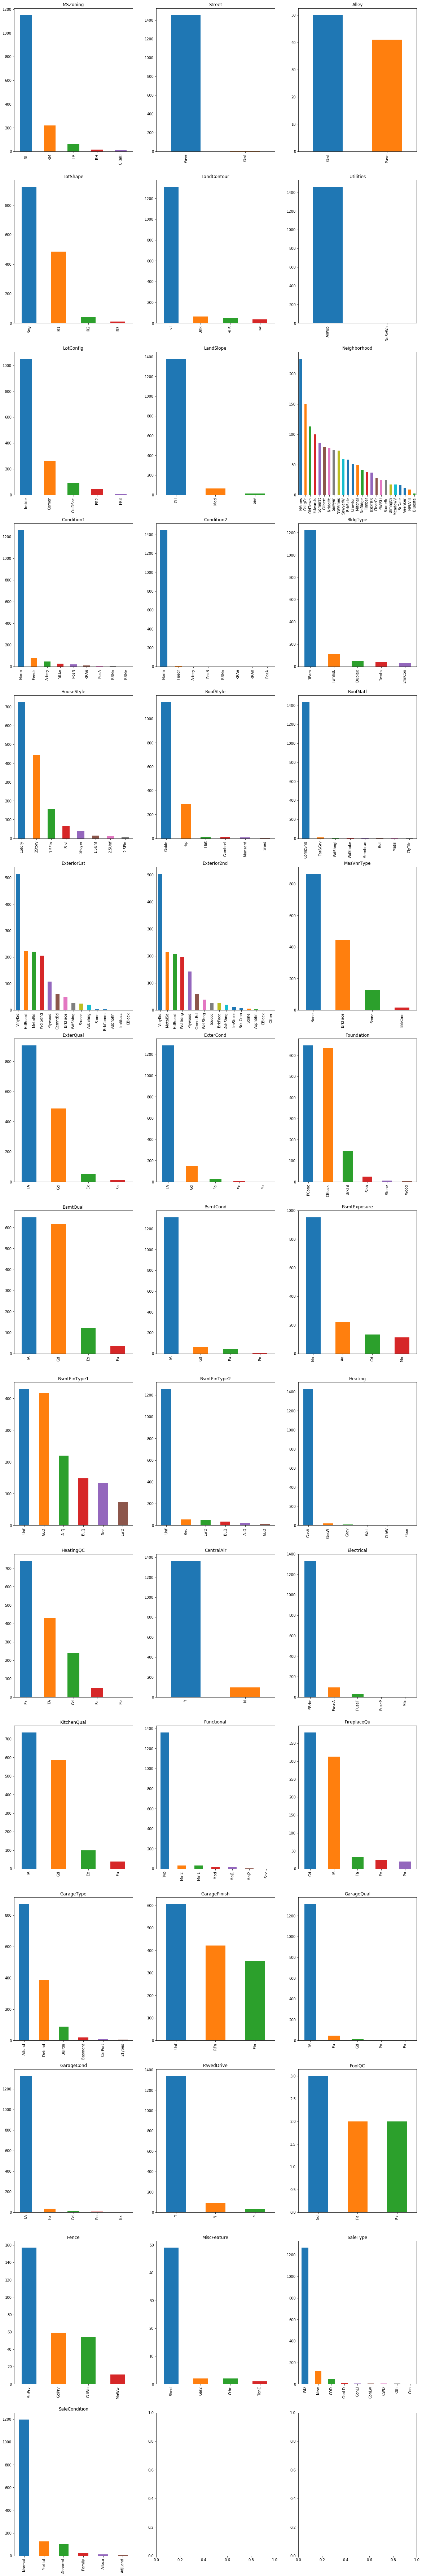

In [79]:
d=df.dtypes[df.dtypes=='object'].index.values

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(20,130));
contador=0;
for x in range(15):
    for y in range(3):
        df[d[contador]].value_counts().plot(kind='bar',ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==43: break
        
        

# 5. Modificaciones a las variables categóricas y valores faltantes

In [80]:
'''Después de analizar los histogramas de las variables categóricas y observar el dataframe, se encuentra que muchas de estas
contienen valores NA. Sin embargo al buscar información sobre este dataset, se pudo determinar que muchos de estos valores NA
apuntan a una categoría. Por ejemplo, en la variables Alley, un valor NA reprenta:   NA 	No alley access
Por tanto, se toma la determinación de realizar esta modificación en las variables que presentan el problema mencionado.bbb
'''

variables=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

replace=['No alley access','No Basement','No Basement','No Basement','No Basement','No Basement',
        'No Fireplace','No Garage','No Garage','No Garage','No Garage','No Pool','No Fence','None']

for x in range(len(variables)):
    df[variables[x]].fillna(replace[x], inplace = True)
        
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,12.0,2008.0,WD,Normal,250000.0
5,6,50,RL,85.0,14115.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0
6,7,20,RL,75.0,10084.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,8.0,2007.0,WD,Normal,307000.0
7,8,60,RL,NaN,10382.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
8,9,50,RM,51.0,6120.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,1.0,2008.0,WD,Normal,118000.0


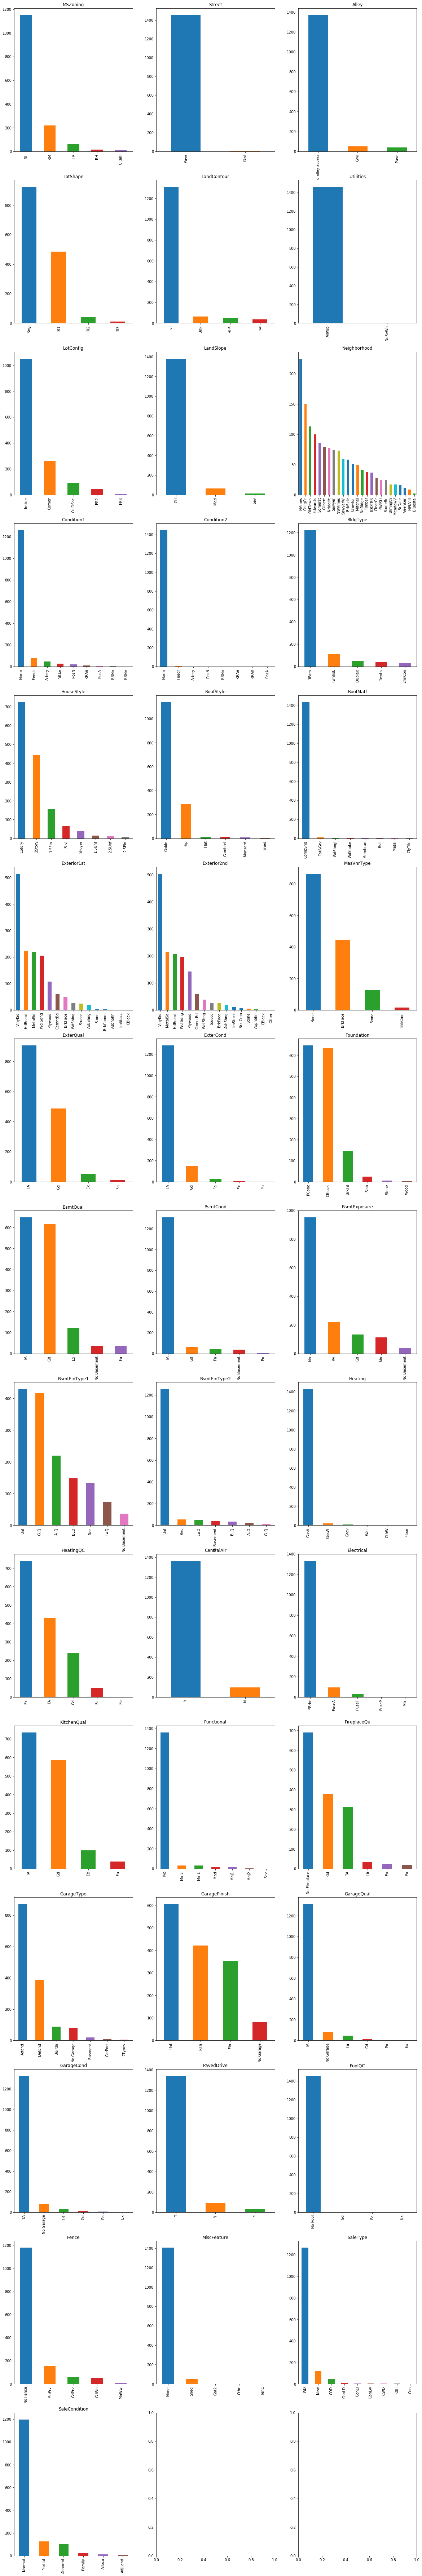

In [81]:
#Se observan de nuevo los histogramas

d=df.dtypes[df.dtypes=='object'].index.values

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(20,130));
contador=0;
for x in range(15):
    for y in range(3):
        df[d[contador]].value_counts().plot(kind='bar',ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==43: break

In [82]:
#Se verifica que ya no existan valores faltantes en las variables modificadas anteriormente

variables=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']


for x in range(len(variables)):
    print(df[variables[x]].isna().sum())


0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [83]:
#Se verifica cuáles variables tienen valores faltantes

df.isna().sum()[df.isna().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [84]:
#Inicialmente se tratan las variables LotFrontage y Electrical

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True) #Se llenan los datos faltantes con la mediana
df['Electrical'].fillna('SBrkr', inplace = True) #Se llenan los datos faltantes con el tipo más común


In [85]:
s=df['MasVnrType'].isna()[df['MasVnrType'].isna()==True].index.values
df.iloc[s][['MasVnrType','MasVnrArea']] #Se verifica que las instancias vacías son las mismas para MasVnrType y MasVnrArea

df['MasVnrType'].fillna('None', inplace = True) #Se llenan los datos faltantes con el tipo más común
df['MasVnrArea'].fillna(0, inplace = True) # Como MasVnrType es None, el área debería ser 0

In [86]:
s=df['GarageYrBlt'].isna()[df['GarageYrBlt'].isna()==True].index.values

df.iloc[s][['GarageYrBlt','GarageType','GarageFinish','GarageQual']] # Se observa que para las instancias que no tienen 
                                                                    #GarageYrBlt es porque realmente no hay garage en la casa.

df['GarageYrBlt'].fillna(0, inplace = True) # Se llenan los datos faltantes con 0 ya que no hay año de construcción como tal

In [87]:
#Se verifica nuevamente el dataframe, en búsqueda de datos faltantes
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

# 5.1 Datos inconsistentes

In [88]:
#Se observa que hay registros en los cuales MasVnrType es None, pero tienen un valor de MasVnrArea

s=df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea > 0), ['MasVnrType','MasVnrArea']].index.values

for x in range(len(s)):
    df.at[s[x],'MasVnrArea']=0 #Se llena con 0, el valor de MasVnrArea
    


## 6. Visualización de las variables numéricas

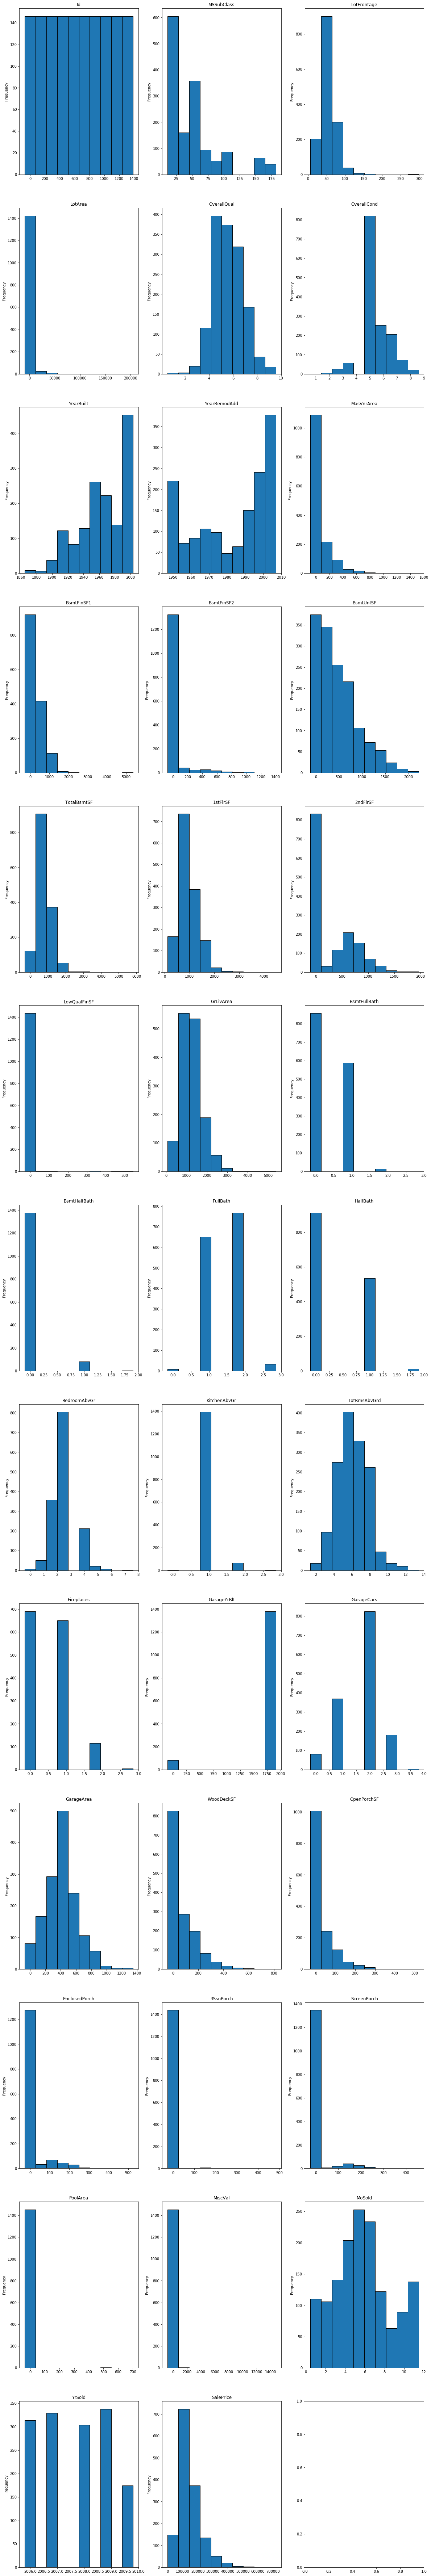

In [89]:
d=df.dtypes[df.dtypes!='object'].index.values

fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20,130));
contador=0;
for x in range(13):
    for y in range(3):
        df[d[contador]].plot.hist(align='left',ec='black',ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==38: break


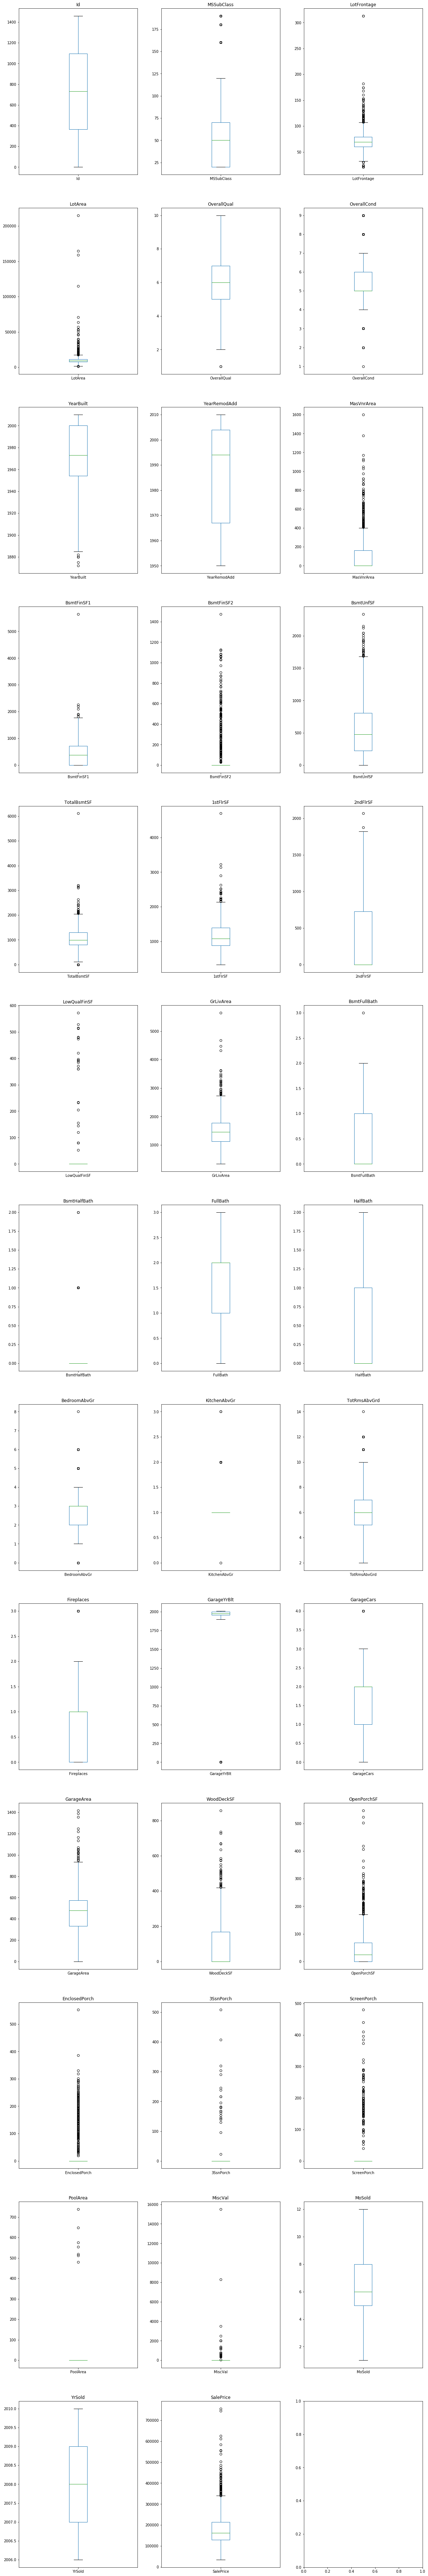

In [90]:
d=df.dtypes[df.dtypes!='object'].index.values

fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20,130));
contador=0;
for x in range(13):
    for y in range(3):
        df[d[contador]].plot.box(ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==38: break


# 7. Escalar variables

In [91]:
#Se decide escalar la variable de SalePrice a miles de dólares

df.at[df.index.values,'SalePrice']=df.loc[df.index.values,'SalePrice']/1000
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,2.0,2008.0,WD,Normal,208.500
1,2,20,RL,80.0,9600.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,5.0,2007.0,WD,Normal,181.500
2,3,60,RL,68.0,11250.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,9.0,2008.0,WD,Normal,223.500
3,4,70,RL,60.0,9550.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,2.0,2006.0,WD,Abnorml,140.000
4,5,60,RL,84.0,14260.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,12.0,2008.0,WD,Normal,250.000
5,6,50,RL,85.0,14115.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143.000
6,7,20,RL,75.0,10084.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,8.0,2007.0,WD,Normal,307.000
7,8,60,RL,69.0,10382.0,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,No Pool,No Fence,Shed,350.0,11.0,2009.0,WD,Normal,200.000
8,9,50,RM,51.0,6120.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,4.0,2008.0,WD,Abnorml,129.900
9,10,190,RL,50.0,7420.0,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,No Pool,No Fence,None,0.0,1.0,2008.0,WD,Normal,118.000


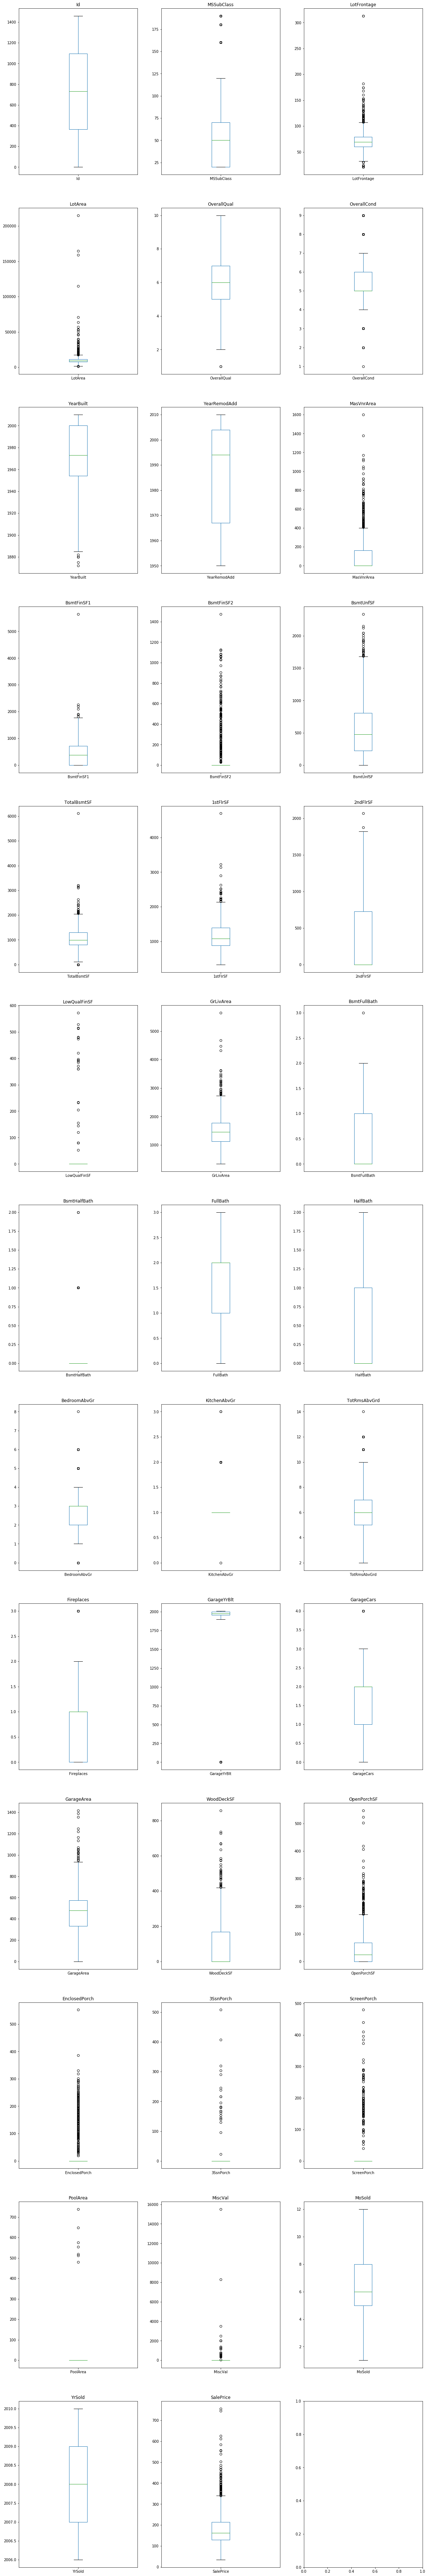

In [92]:
d=df.dtypes[df.dtypes!='object'].index.values

fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20,130));
contador=0;
for x in range(13):
    for y in range(3):
        df[d[contador]].plot.box(ax=axes[x,y]);
        axes[x,y].set_title(d[contador])
        contador+=1
        if contador==38: break


# 8. Transformación de datos

In [93]:
#Se transforman a numéricas variables categóricas que pueden aportan información interesante

dummy_cols = 'HouseStyle,GarageType,Utilities'.split(",")# es mas rapido escribir asi esta lista :)
df2 = pd.get_dummies(df, columns=dummy_cols)
cols = [c for c in df2.columns if c not in dummy_cols]
newdf = df2[cols]
newdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,HouseStyle_SLvl,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,Utilities_AllPub,Utilities_NoSeWa
0,1,60,RL,65.0,8450.0,Pave,No alley access,Reg,Lvl,Inside,...,0,0,1,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600.0,Pave,No alley access,Reg,Lvl,FR2,...,0,0,1,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250.0,Pave,No alley access,IR1,Lvl,Inside,...,0,0,1,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550.0,Pave,No alley access,IR1,Lvl,Corner,...,0,0,0,0,0,0,1,0,1,0
4,5,60,RL,84.0,14260.0,Pave,No alley access,IR1,Lvl,FR2,...,0,0,1,0,0,0,0,0,1,0
5,6,50,RL,85.0,14115.0,Pave,No alley access,IR1,Lvl,Inside,...,0,0,1,0,0,0,0,0,1,0
6,7,20,RL,75.0,10084.0,Pave,No alley access,Reg,Lvl,Inside,...,0,0,1,0,0,0,0,0,1,0
7,8,60,RL,69.0,10382.0,Pave,No alley access,IR1,Lvl,Corner,...,0,0,1,0,0,0,0,0,1,0
8,9,50,RM,51.0,6120.0,Pave,No alley access,Reg,Lvl,Inside,...,0,0,0,0,0,0,1,0,1,0
9,10,190,RL,50.0,7420.0,Pave,No alley access,Reg,Lvl,Corner,...,0,0,1,0,0,0,0,0,1,0


# 9. Manejo de Outliers

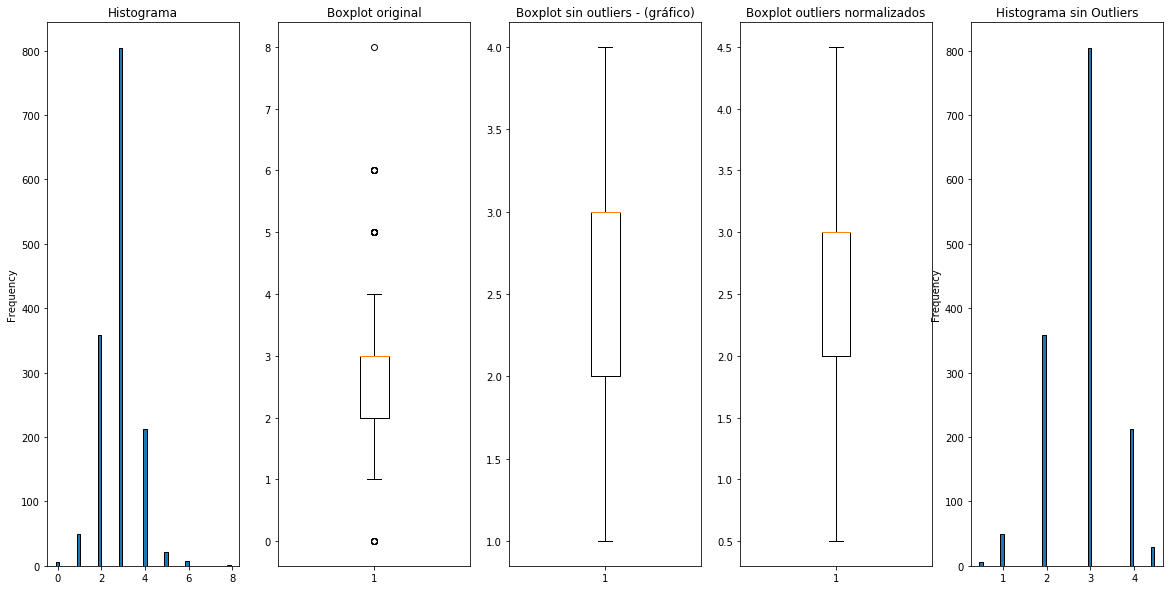

In [94]:
# A modo de ejemplo, se muestra cómo manejar los outliers, en una variable numérica BedroomAbvGr

fig, axes=plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
df['BedroomAbvGr'].plot.hist(align='left',ec='black', bins=50, ax=axes[0]);
axes[1].boxplot(df['BedroomAbvGr']);
axes[2].boxplot(df['BedroomAbvGr'],0,''); #Boxplot sin outliers (método gráfico)

Q1=df['BedroomAbvGr'].quantile(0.25);Q3=df['BedroomAbvGr'].quantile(0.75);IQR=Q3-Q1;MAX=Q3+1.5*IQR;MIN=Q1-1.5*IQR #cálculo de
                                                                                                                  #IQR, Q1, Q3, MAX, MIN 


outlup=df['BedroomAbvGr'][df['BedroomAbvGr']>MAX].index.values #Outliers por encima
outldown=df['BedroomAbvGr'][df['BedroomAbvGr']<MIN].index.values # Outliers por debajo

for x in range(len(outlup)):
    df.at[outlup[x],'BedroomAbvGr']=MAX

for x in range(len(outldown)):
    df.at[outldown[x],'BedroomAbvGr']=MIN
    
    
axes[3].boxplot(df['BedroomAbvGr']);
df['BedroomAbvGr'].plot.hist(align='left',ec='black', bins=50, ax=axes[4]);


axes[0].set_title("Histograma");
axes[1].set_title("Boxplot original");
axes[2].set_title("Boxplot sin outliers - (gráfico)");
axes[3].set_title("Boxplot outliers normalizados");
axes[4].set_title("Histograma sin Outliers");



# 10. Gráficas de correlación entre las variables

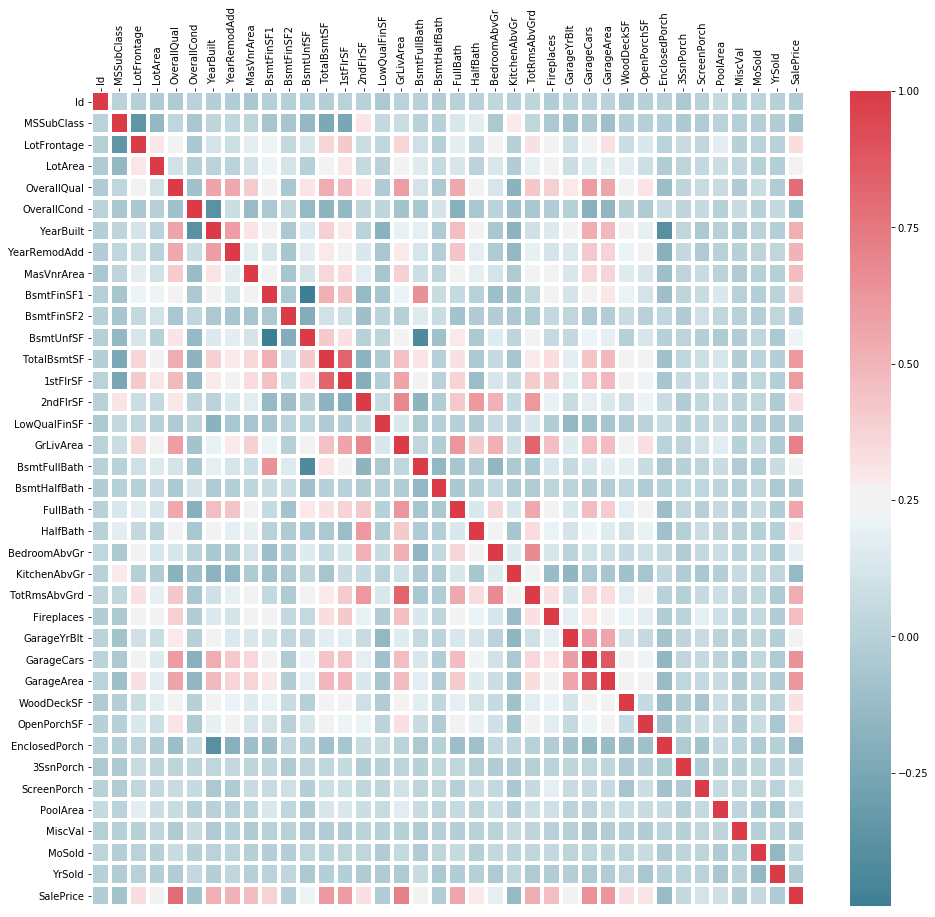

In [95]:
corr = df.corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap,linewidths = 3)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

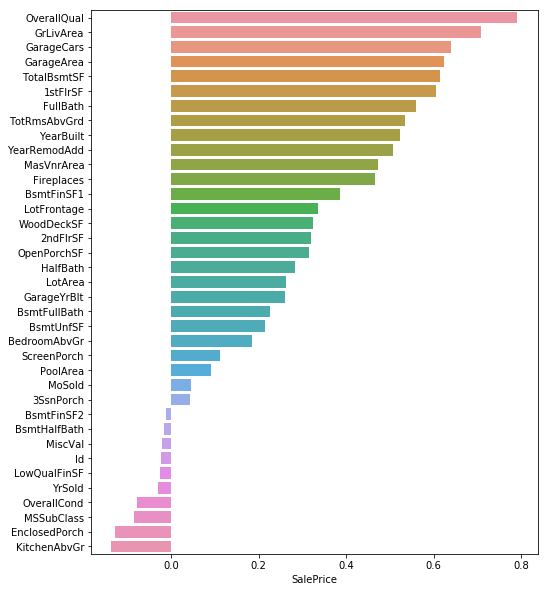

In [96]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()



# 10.1 Gráficas de correlación entre las variables (incluidas las que se pasaron a numéricas)

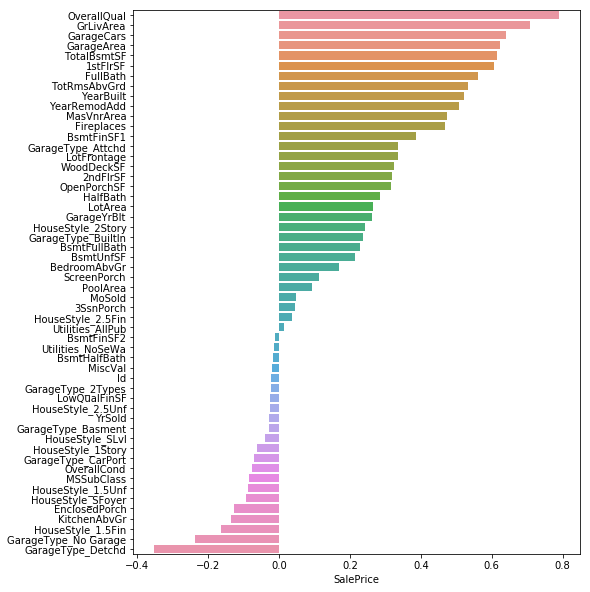

In [97]:
corr= newdf.corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()
